In [44]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import pydot
import pydotplus
from IPython.display import Image
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score, classification_report, plot_roc_curve

In [49]:
import os
os.environ["PATH"] += os.pathsep + 'D:/programs/Graphviz/bin'

In [2]:
df = pd.read_csv("mortgage_final_data.csv")
df.head(5)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,gdp_dif,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc,status_time
0,1,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,...,-0.183234,-0.063203,4.7,7.241667,3.6,0.765957,176.657917,59.42,0.682753,1
1,2,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,...,-0.747772,-0.257929,4.7,4.700000,0.0,0.000000,225.695000,38.19,0.204323,2
2,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,...,-1.206168,-0.416044,4.7,4.580000,-0.2,-0.042553,222.164000,127.79,1.426546,2
3,5,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,...,-0.537415,-0.185371,4.7,4.600000,-0.3,-0.063830,224.593333,35.48,0.189824,2
4,6,56,19,25,139,190474.11,75.834755,6.580,181.43,1.717053,...,-1.182084,-0.407736,4.7,7.319355,1.9,0.404255,175.143226,-9.99,-0.052189,1


In [3]:
df = pd.read_csv("mortgage_final_data.csv")
X = pd.DataFrame(df)
y = pd.DataFrame(df["status_time"])
X = X.drop(columns = ["status_time", "id"])
feature_list = list(X.columns)
y=y.to_numpy()

In [4]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y.ravel(), test_size=0.2, random_state=7)

In [5]:
rf =RandomForestClassifier(oob_score=True,random_state=7,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=7)

In [6]:
rf.score(X_valid, y_valid)

0.7989456026839205

In [7]:
rf.score(X_train, y_train)

0.999970044633496

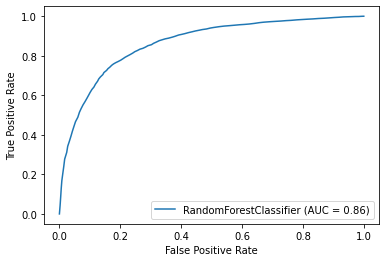

In [8]:
plot_roc_curve(rf, X_valid, y_valid)

In [9]:
param_test1 = {"n_estimators":range(1,301,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                        scoring='roc_auc',cv=10,n_jobs=-1)
gsearch1.fit(X_train, y_train)

print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

{'n_estimators': 241}
best accuracy:0.868822


In [10]:
param_test2 = {"max_features":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=251,
                        random_state=7,n_jobs=-1),
                        param_grid = param_test2,scoring='roc_auc',cv=10)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

KeyboardInterrupt: 

In [143]:
param_test3 = {"max_depth":range(1,12,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=251,
                        max_features=6,random_state=7),
                        param_grid = param_test3,scoring='roc_auc',cv=10,n_jobs=-1)
gsearch1.fit(X_train, y_train)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

{'max_depth': 11}
best accuracy:0.870346


In [11]:
rf1 = RandomForestClassifier(n_estimators=251,max_features=6,
                             max_depth=11,oob_score=True,random_state=7, n_jobs=-1)
rf1.fit(X_train,y_train)


RandomForestClassifier(max_depth=11, max_features=6, n_estimators=251,
                       n_jobs=-1, oob_score=True, random_state=7)

In [12]:
rf1.score(X_train, y_train)


0.8611868316208848

In [13]:
rf1.score(X_valid, y_valid)

0.8031392283728732

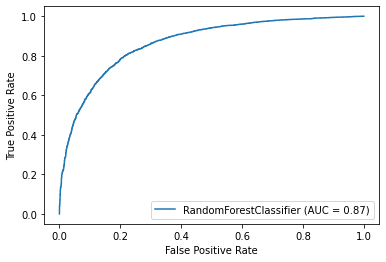

In [14]:
plot_roc_curve(rf1, X_valid, y_valid)

In [150]:
importances = list(rf1.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: LTV_dif              Importance: 0.13
Variable: LTV_inc              Importance: 0.12
Variable: LTV_time             Importance: 0.11
Variable: FICO_orig_time       Importance: 0.07
Variable: hpi_inc              Importance: 0.07
Variable: hpi_dif              Importance: 0.06
Variable: gdp_avg              Importance: 0.05
Variable: time                 Importance: 0.04
Variable: balance_time         Importance: 0.03
Variable: interest_rate_time   Importance: 0.03
Variable: balance_orig_time    Importance: 0.03
Variable: orig_time            Importance: 0.02
Variable: mat_time             Importance: 0.02
Variable: LTV_orig_time        Importance: 0.02
Variable: Interest_Rate_orig_time Importance: 0.02
Variable: uer_dif              Importance: 0.02
Variable: uer_inc              Importance: 0.02
Variable: first_time           Importance: 0.01
Variable: hpi_time             Importance: 0.01
Variable: gdp_time             Importance: 0.01
Variable: uer_time             Import

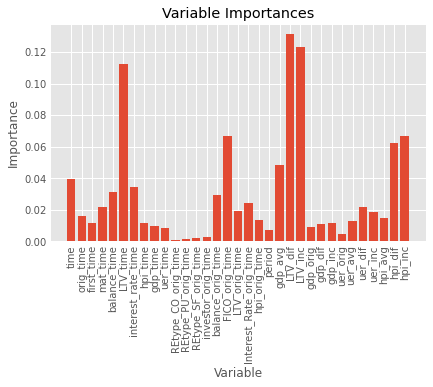

In [180]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('ggplot')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
Estimators =rf1.estimators_

In [23]:
X = df.drop(columns = ["status_time", "id"])

In [35]:
X=X.columns.values
Y="Status_time"

In [51]:
for index, model in enumerate(Estimators):
    filename = 'IBM' + str(index) + '.pdf'
    dot_data = tree.export_graphviz(model , out_file=None,
                         feature_names=X,
                         class_names=Y,
                         filled=True, rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    graph.write_pdf(filename)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.388087 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.32627 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.338754 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.39296 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.336068 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.365475 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.365715 to fit



KeyboardInterrupt: 